In [1]:
import pandas as pd
import numpy as np
import random
import math
import csv
#from compiler.ast import flatten
import matplotlib.pyplot as plt
from matplotlib import patches
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import math
import csv
import random
import string
from numpy import array, cov, corrcoef
import stats as sts
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from sklearn import preprocessing
import pandas as pd
import numpy as np
import os
import tarfile
from keras.optimizers import adam, rmsprop, adadelta
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.tree import  DecisionTreeRegressor
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from keras import backend as K
from keras import optimizers
from keras.layers import *
from keras.initializers import *
from keras.models import *
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import metrics
import csv
import warnings
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def generate_3d_sample(mean_array, num_samples_per_cluster, cov, output_side_length):
    y = np.zeros((num_samples_per_cluster * len(mean_array), 3))
    for i in range(len(mean_array)):
        generated_data = np.floor(np.random.multivariate_normal(mean_array[i], cov, num_samples_per_cluster))
        y[(num_samples_per_cluster * i):(num_samples_per_cluster * (i + 1)), :] = generated_data

    z = np.zeros((output_side_length,output_side_length, output_side_length))
    for i in range(output_side_length):
            for j in range(output_side_length):
                for k in range(output_side_length):
                    if (y == [i,j,k]).all(1).any():
                        z[i,j,k] = 1
    return z

In [8]:
total_num=6000
#62500
for num in range(1,6000):
    num_mean=num
    output_side_length = 20
    num_samples_per_cluster = int(total_num/num_mean)
    #num_samples_per_cluster = 50
    cov = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
    sample=random.sample(range(0,int(math.pow(output_side_length,3))),num_mean)
    mean_array=[]
    for i in range(num_mean):
        tuple_z=int(sample[i]/math.pow(output_side_length,2))
        tuple_y=int((sample[i]%math.pow(output_side_length,2))/output_side_length)
        tuple_x=int(sample[i]%output_side_length)
        tuple_sample=(tuple_x,tuple_y,tuple_z)
        mean_array.append(tuple_sample)
    #z = generate_3d_sample(mean_array, num_samples_per_cluster, cov, output_side_length)
    z = generate_3d_sample(mean_array, num_samples_per_cluster, cov, output_side_length)
    xx = z.flatten()
    filename='data'+str(num)+'.csv'
    with open("C:/Users/Administrator/Desktop/3_23/" + filename, "w", newline='') as csvfile:
        writer = csv.writer(csvfile)
        for j in range(len(xx)):
            if xx[j] == 1:
                value=1
            else:
                value=0
            writer.writerow([value])
    print(num)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


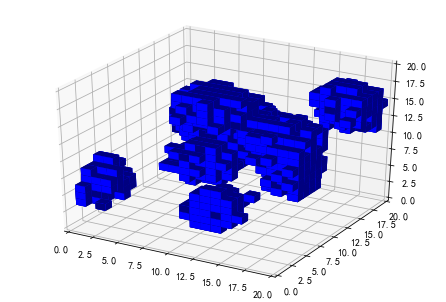

data_len 932


In [11]:
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']

def plot_cube(num,N):
    num_x=int(num%N)
    num_y=int((num%math.pow(N,2))/N)
    num_z=int(num/math.pow(N,2))
    xx=np.linspace(num_x, num_x+1, 2)
    yy=np.linspace(num_y, num_y+1, 2)
    zz=np.linspace(num_z, num_z+1, 2)
    
    xx,yy=np.meshgrid(xx, yy)    
    z=np.zeros((1,1))
    z[0]=num_z
    ax.plot_surface(xx, yy, z ,color='b')
    ax.plot_surface(xx, yy, z+1,color='b')
    
    yy,zz = np.meshgrid(yy, zz)
    x=np.zeros((1,1))
    x[0]=num_x
    ax.plot_surface(x,yy,zz,color='b')
    ax.plot_surface(x+1,yy,zz,color='b')
    
    xx, zz = np.meshgrid(xx, zz)
    y=np.zeros((1,1))
    y[0]=num_y
    ax.plot_surface(xx,y,zz,color='b')
    ax.plot_surface(xx,y+1,zz,color='b')
    
    #ax.set_zlim(-2, 2)
    
#ata=pd.read_csv("C:/Users/Administrator/Desktop/sample_3_10.csv",encoding = "utf-8",header=None)
data=np.loadtxt("C:/Users/Administrator/Desktop/3_23/data10.csv",delimiter=",",skiprows=0)
N=20
data2=[]
for i in range(0,N*N*N):
    if data[i]==1:
        data2.append(i)
fig= plt.figure()
ax = Axes3D(fig)

for i in range(N*N*N):
    if i in data2:
        plot_cube(i,N)
ax.set_zlim(0, 20)
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
plt.show()
print('data_len',len(data2))

In [12]:
import math
import csv
import random
import string
from numpy import array, cov, corrcoef
import numpy as np
import stats as sts
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from sklearn import preprocessing
import pandas as pd
import numpy as np
import os
import tarfile
from keras.optimizers import adam, rmsprop, adadelta
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.tree import  DecisionTreeRegressor
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from keras import backend as K
from keras import optimizers
import numpy as np
import keras.backend as K
from keras.layers import *
from keras.initializers import *
from keras.models import *

Using TensorFlow backend.


In [14]:
data=[]
for num in range(1,6000):
    print(num)
    f1=open('F:\chenlong_work\ELEC3D_for_Chen\ec3d.pam', 'r')
    str1=f1.readline()
    with open("F:\chenlong_work\ELEC3D_for_Chen\ec3d.pam", "r", encoding="utf-8") as f_R:
        lines = f_R.readlines()
    with open("F:\chenlong_work\ELEC3D_for_Chen\ec3d.pam", "w", encoding="utf-8") as f_w:
        for line in lines:
            if str1 in line:
                line = line.replace(str1,"data"+str(num)+".csv"+"\n")
            f_w.write(line)
    os.system('F:&&cd chenlong_work&&cd ELEC3D_for_Chen&& ELEC3D')
    with open("F:\chenlong_work\ELEC3D_for_Chen\outputfile.out", "r", encoding="utf-8") as f_O:
        lines = f_O.readlines()
        for line in lines:
            if 'Current in x direction =' in line:
                value1=float(line.split('=')[1].strip())
                print(value1,type(value1))
    data.append([value1])
    
with open("F:/chenlong_work/ELEC3D_for_Chen/label.csv","w",newline='') as f3:
    writer = csv.writer(f3)
    for row in data:
        writer.writerow(row)

1
0.190570176 <class 'float'>
2
0.183177039 <class 'float'>
3
0.182930365 <class 'float'>
4
0.178729191 <class 'float'>
5
0.181421429 <class 'float'>
6
0.17140767 <class 'float'>
7
0.164114088 <class 'float'>
8
0.170695066 <class 'float'>
9
0.158420607 <class 'float'>
10
0.161311805 <class 'float'>
11
0.164364278 <class 'float'>
12
0.153659686 <class 'float'>
13
0.160351112 <class 'float'>
14
0.156073153 <class 'float'>
15
0.150013417 <class 'float'>
16
0.148167118 <class 'float'>
17
0.145293072 <class 'float'>
18
0.145307481 <class 'float'>
19
0.152657241 <class 'float'>
20
0.149591759 <class 'float'>
21
0.144371852 <class 'float'>
22
0.142828256 <class 'float'>
23
0.144994214 <class 'float'>
24
0.143496469 <class 'float'>
25
0.141640425 <class 'float'>
26
0.139895111 <class 'float'>
27
0.13657093 <class 'float'>
28
0.133621097 <class 'float'>
29
0.132868007 <class 'float'>
30
0.134720817 <class 'float'>
31
0.145034313 <class 'float'>
32
0.126151562 <class 'float'>
33
0.128890112 <cla

In [15]:
datas=[]
for num1 in range(1,6000):
    print(num1)
    filename = "data" + str(num1) + ".csv"
    with open("F:\chenlong_work\ELEC3D_for_Chen/" + filename, "rt", encoding="utf-8") as csvfile:
        reader = csv.reader(csvfile)
        rows = [row[0] for row in reader]
        datas.append(rows)
with open('F:\chenlong_work\ELEC3D_for_Chen/data.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    for row in datas:
        writer.writerow(row)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [16]:
#计算体积，表面积--------
data = np.loadtxt("F:\chenlong_work\ELEC3D_for_Chen/data.csv",delimiter=",",skiprows=0)
#y_label = np.loadtxt("E:/ELEC3D_for_Chen/8000_label.csv",delimiter=",",skiprows=0)
row_num=5999
N=20
new_data=[]
#new_data.append([0,0,0,0,0,0,0,0,0,0,0,0])
for row in range(0,row_num):
    volume = 0
    surface = 0
    width_num=0
    mean_width=0
    x=0
    x_point=[]
    y_point=[]
    z_point=[]
    #计算1-体积
    for i in range(0,N*N*N):
        if data[row][i] == 1:
            volume=volume+1
            x = int(i % N)
            y = int(i / N % N)
            z = int(i / (N * N))
            x_point.append(x)
            y_point.append(y)
            z_point.append(z)
    #计算宽度个数和表面姐
    for y in range(0,N):
        for z in range(0,N):
            if data[row][x+y*N+z*N*N]==1:
                surface=surface+1
                width_num=width_num+1
    #print(width_num)
    x=N-1
    for y in range(0,N):
        for z in range(0,N):
            if data[row][x+y*N+z*N*N]==1:
                surface=surface+1
                if data[row][(x-1)+y*N+z*N*N]==0:
                    width_num=width_num+1
    for x in range(1,N-1):
        for y in range(0, N):
            for z in range(0, N):
                if data[row][x+y*N+z*N*N]==1:
                    if data[row][x-1+y*N+z*N*N]==0:
                        surface=surface+1
                        width_num=width_num+1
                    if data[row][x+1+y*N+z*N*N]==0:
                        surface=surface+1

    y = 0
    for x in range(0, N):
        for z in range(0, N):
            if data[row][x + y * N + z * N * N] == 1:
                width_num = width_num + 1
                surface = surface + 1
    y = N-1
    for x in range(0, N):
        for z in range(0, N):
            if data[row][x + y * N + z * N * N] == 1:
                surface = surface + 1
                if data[row][x+(y-1)*N+z*N*N]==0:
                    width_num=width_num+1
    for y in range(1, N - 1):
        for x in range(0, N):
            for z in range(0, N):
                if data[row][x + y * N + z * N * N] == 1:
                    if data[row][x + (y-1) * N + z * N * N] == 0:
                        width_num = width_num + 1
                        surface = surface + 1
                    if data[row][x + (y+1) * N + z * N * N] == 0:
                        surface = surface + 1

    z = 0
    for x in range(0, N):
        for y in range(0, N):
            if data[row][x + y * N + z * N * N] == 1:
                width_num = width_num + 1
                surface = surface + 1
    z = N-1
    for x in range(0, N):
        for y in range(0, N):
            if data[row][x + y * N + z * N * N] == 1:
                surface = surface + 1
                if data[row][x + y * N + (z-1) * N * N] == 0:
                    width_num = width_num + 1
    for z in range(1, N - 1):
        for x in range(0, N):
            for y in range(0, N):
                if data[row][x + y * N + z * N * N] == 1:
                    if data[row][x + y * N + (z-1) * N * N] == 0:
                        width_num = width_num + 1
                        surface = surface + 1
                    if data[row][x + y * N + (z+1) * N * N] == 0:
                        surface = surface + 1
    #print(volume)
    if width_num==0:
        width_num=1
    mean_width=volume*3/width_num
    Median=(np.median(x_point)+np.median(y_point)+np.median(z_point))/3
    mean_v=(np.mean(x_point)+np.mean(y_point)+np.mean(z_point))/3
    standard_deviation=(np.std(x_point)+np.std(y_point)+np.std(z_point))/3
    Dispersion_coefficient=standard_deviation / mean_v
    Upper_quartile=(sts.quantile(x_point, p=0.25)+sts.quantile(y_point, p=0.25)+sts.quantile(z_point, p=0.25))/3
    Lower_Quantile=(sts.quantile(x_point, p=0.75)+sts.quantile(y_point, p=0.75)+sts.quantile(z_point, p=0.75))/3
    quartile_deviation=Lower_Quantile-Upper_quartile
    skewness=(sts.skewness(x_point)+sts.skewness(y_point)+sts.skewness(z_point))/3
    kurtosis=(sts.kurtosis(x_point)+sts.kurtosis(y_point)+sts.kurtosis(z_point))/3
    print('row',row)
    print('上四分位数', Upper_quartile)
    print('下四分位数', Lower_Quantile)
    print('四分位差', quartile_deviation)
    print('中位数:', Median)
    print('平均值:', mean_v)
    print('标准差:', standard_deviation)
    print('离散系数:',Dispersion_coefficient)
    print('偏度:', skewness)
    print('峰度:', kurtosis)
    print('平均宽度:',mean_width)
    print('表面积:',surface)
    print('体积:',volume)

    new_data.append([Upper_quartile,Lower_Quantile,quartile_deviation,Median,mean_v,standard_deviation,
                     Dispersion_coefficient,skewness,kurtosis,mean_width,surface,volume])

with open("F:\chenlong_work\ELEC3D_for_Chen/s_data.csv","w",newline='') as f3:
    writer = csv.writer(f3)
    for row in new_data:
        writer.writerow(row)

row 0
上四分位数 5.0
下四分位数 7.666666666666667
四分位差 2.666666666666667
中位数: 6.333333333333333
平均值: 6.281639928698752
标准差: 1.642155350523858
离散系数: 0.2614214391724984
偏度: 0.08041879298465315
峰度: -0.9371320085055229
平均宽度: 3.816326530612245
表面积: 290
体积: 187
row 1
上四分位数 9.333333333333334
下四分位数 15.0
四分位差 5.666666666666666
中位数: 12.0
平均值: 12.16712580348944
标准差: 2.8577882185159744
离散系数: 0.23487783924255817
偏度: -0.019322360953336958
峰度: -1.1159370028291375
平均宽度: 3.3819875776397517
表面积: 607
体积: 363
row 2
上四分位数 3.3333333333333335
下四分位数 13.333333333333334
四分位差 10.0
中位数: 5.0
平均值: 7.803212851405623
标准差: 5.312014061407623
离散系数: 0.6807470413229532
偏度: 0.5708733032840847
峰度: -1.2087472772283496
平均宽度: 3.5878962536023056
表面积: 682
体积: 415
row 3
上四分位数 3.0
下四分位数 11.333333333333334
四分位差 8.333333333333334
中位数: 6.666666666666667
平均值: 7.230869001297016
标准差: 5.291587543000529
离散系数: 0.7318052010140642
偏度: 0.48467737957490886
峰度: -1.0290203689281088
平均宽度: 3.1925465838509317
表面积: 923
体积: 514
row 4
上四分位数 4.0
下四分位数 11.0
四分位差 

In [17]:
#整合训练数据
new_data=[]
x_data = np.loadtxt("F:\chenlong_work\ELEC3D_for_Chen/s_data.csv",delimiter=",",skiprows=0)
y_data = np.loadtxt("F:\chenlong_work\ELEC3D_for_Chen/label.csv",delimiter=",",skiprows=0)

new_data.append(['label','Upper_quartile','Lower_Quantile','quartile_deviation','Median','average_value','standard_deviation',
                     'Dispersion_coefficient','skewness','kurtosis','mean_width','surface','volume'])

for row in range(0,5999):
    label=y_data[row]
    Upper_quartile=x_data[row][0]
    Lower_Quantile=x_data[row][1]
    quartile_deviation=x_data[row][2]
    Median=x_data[row][3]
    average_value=x_data[row][4]
    standard_deviation=x_data[row][5]
    Dispersion_coefficient=x_data[row][6]
    skewness=x_data[row][7]
    kurtosis=x_data[row][8]
    mean_width=x_data[row][9]
    surface=x_data[row][10]
    volume=x_data[row][11]
    new_data.append([label, Upper_quartile, Lower_Quantile, quartile_deviation, Median, average_value,
                     standard_deviation,Dispersion_coefficient, skewness, kurtosis, mean_width, surface, volume])

with open("F:\chenlong_work\ELEC3D_for_Chen/train_data.csv","w",newline='') as f3:
    writer = csv.writer(f3)
    for row in new_data:
        writer.writerow(row)

In [2]:
#导入数据
data = pd.read_csv("C:/Users/Administrator/Desktop/ELEC3D_for_Chen/train_data.csv")

In [3]:
data.describe()

label  Upper_quartile  Lower_Quantile  quartile_deviation  \
count  5999.000000     5999.000000     5999.000000         5999.000000   
mean      0.094072        4.388731       14.008001            9.619270   
std       0.014342        0.303344        0.147255            0.318839   
min       0.072781        3.000000        7.666667            2.666667   
25%       0.082881        4.333333       14.000000            9.333333   
50%       0.090303        4.333333       14.000000            9.666667   
75%       0.102981        4.666667       14.000000           10.000000   
max       0.190570        9.333333       15.666667           11.333333   

            Median  average_value  standard_deviation  Dispersion_coefficient  \
count  5999.000000    5999.000000         5999.000000             5999.000000   
mean      9.083236       9.295569            5.586011                0.600990   
std       0.213665       0.105995            0.074013                0.009629   
min       5.000000       6.281640            1.642155                0.234878   
25%       9.000000       9.262956            5.573789                0.598689   
50%       9.000000       9.295859            5.590150                0.601320   
75%       9.000000       9.328096            5.604306                0.603898   
max      12.000000      12.167126            5.965867                0.731805   

          skewness     kurtosis   mean_width       surface       volume  
count  5999.000000  5999.000000  5999.000000   5999.000000  5999.000000  
mean      0.010447    -1.182590     1.735369  10716.290548  3205.793799  
std       0.023668     0.021328     0.212974   1121.186598   437.865328  
min      -0.259766    -1.377342     1.357836    290.000000   187.000000  
25%       0.002273    -1.190625     1.591777  10490.500000  2946.000000  
50%       0.010299    -1.183983     1.735165  10986.000000  3315.000000  
75%       0.018379    -1.177188     1.849182  11339.500000  3532.000000  
max       0.570873    -0.615979     3.816327  11899.000000  3895.000000

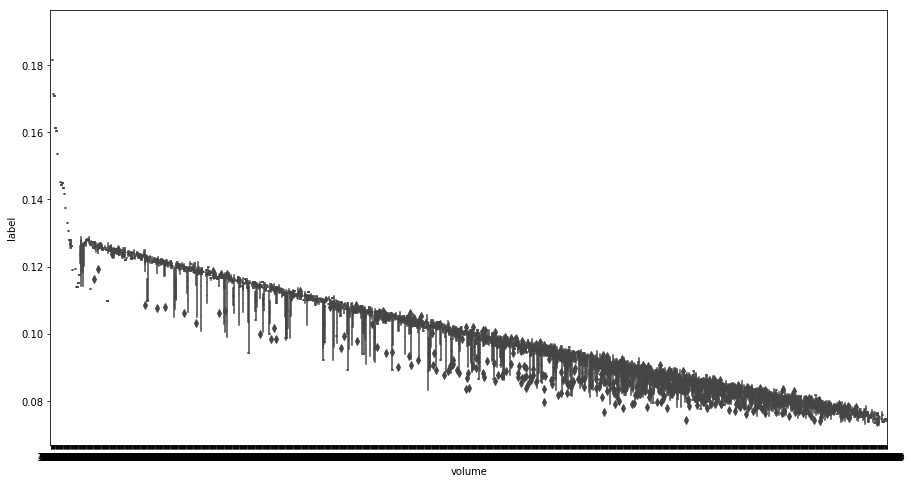

In [4]:
plt.figure(figsize=(15,8))
sns.boxplot(data.volume, data.label)

In [5]:
data.head()

label  Upper_quartile  Lower_Quantile  quartile_deviation     Median  \
0  0.190570        5.000000        7.666667            2.666667   6.333333   
1  0.183177        9.333333       15.000000            5.666667  12.000000   
2  0.182930        3.333333       13.333333           10.000000   5.000000   
3  0.178729        3.000000       11.333333            8.333333   6.666667   
4  0.181421        4.000000       11.000000            7.000000   8.666667   

   average_value  standard_deviation  Dispersion_coefficient  skewness  \
0       6.281640            1.642155                0.261421  0.080419   
1      12.167126            2.857788                0.234878 -0.019322   
2       7.803213            5.312014                0.680747  0.570873   
3       7.230869            5.291588                0.731805  0.484677   
4       8.403024            5.115030                0.608713  0.264213   

   kurtosis  mean_width  surface  volume  
0 -0.937132    3.816327    290.0   187.0  
1 -1.115937    3.381988    607.0   363.0  
2 -1.208747    3.587896    682.0   415.0  
3 -1.029020    3.192547    923.0   514.0  
4 -0.615979    3.162162    906.0   507.0

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


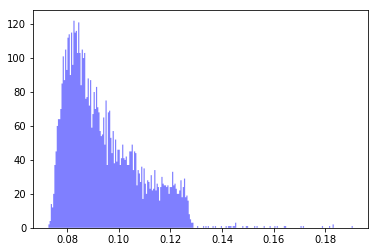

In [6]:
plt.clf()
plt.hist(data.loc[:,'label'],bins=256,normed=0, histtype='stepfilled', facecolor='b', alpha=0.5)
plt.show()

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


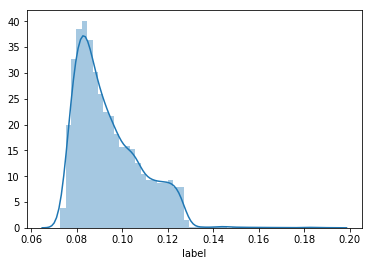

In [7]:
sns.distplot(data['label'])  
plt.show()

In [8]:
print("Skewness: %f" % data['label'].skew())
print("Kurtosis: %f" % data['label'].kurt())

Skewness: 1.069606
Kurtosis: 1.532766


In [9]:
Y_log=np.log(data['label'])

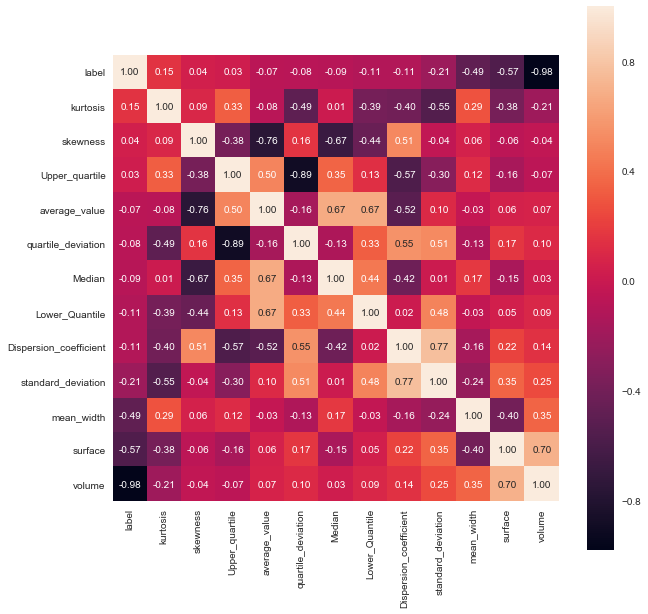

In [10]:
corrmat = data.corr()
plt.figure(figsize=(10,10))
k = 13 #number of variables for heatmap
cols = corrmat.nlargest(k, 'label')['label'].index
cm = np.corrcoef(data[cols].values.T)
#sns.set(font_scale=1.25)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

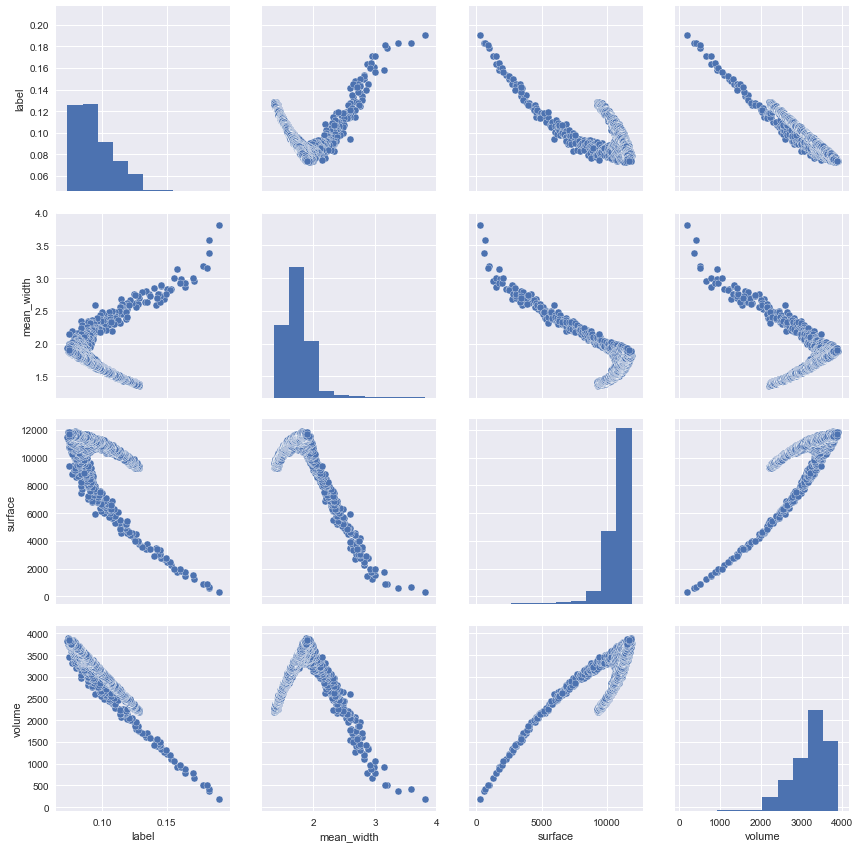

In [11]:
sns.set()
cols = ['label', 'mean_width', 'surface', 'volume']
sns.pairplot(data[cols], size = 3)
plt.show();

In [12]:
X=data[['mean_width', 'surface', 'volume']]

In [13]:
X.head()

mean_width  surface  volume
0    3.816327    290.0   187.0
1    3.381988    607.0   363.0
2    3.587896    682.0   415.0
3    3.192547    923.0   514.0
4    3.162162    906.0   507.0

In [14]:
#归一化处理
X = (X- X.min()) / (X.max() - X.min())

In [15]:
X.head()

mean_width   surface    volume
0    1.000000  0.000000  0.000000
1    0.823331  0.027306  0.047465
2    0.907085  0.033767  0.061489
3    0.746275  0.054527  0.088188
4    0.733916  0.053062  0.086300

In [16]:
Y_log.head()

0   -1.657735
1   -1.697302
2   -1.698650
3   -1.721884
4   -1.706933
Name: label, dtype: float64

In [17]:
#分割训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X,Y_log, test_size=0.2, random_state=0)

In [68]:
#定义rmse
def compute_rmse(y1, y2):
    return np.mean((y1 - y2) ** 2) ** 0.5

In [18]:
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [19]:
models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor()]

In [40]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_train, y_train)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 0.012420, 0.0005
Ridge: 0.016104, 0.0004
Lasso: 0.091567, 0.0032
RF: 0.012091, 0.0006
GBR: 0.011304, 0.0005
SVR: 0.048979, 0.0013
LinSVR: 0.012855, 0.0012
Ela: 0.019202, 0.0004
SGD: 0.070309, 0.0031
Bay: 0.012420, 0.0005
Ker: 0.012529, 0.0002
Extra: 0.012303, 0.0006


D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Xgb: 0.011677, 0.0005


D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [22]:
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [24]:
#LinearRegression
grid(LinearRegression()).grid_get(X,Y_log,{})

{} 0.015792043426523798
  params  mean_test_score  std_test_score
0     {}         0.015792        0.000259


D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acc

In [25]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
#RandomForestRegressor
grid(RandomForestRegressor()).grid_get(X_train,y_train,{'n_estimators':[400,500,600]})

{'n_estimators': 500} 0.011649452505705135
                  params  mean_test_score  std_test_score
0  {'n_estimators': 400}         0.011657        0.000012
1  {'n_estimators': 500}         0.011649        0.000012
2  {'n_estimators': 600}         0.011652        0.000011


D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acc

In [43]:
RFR=RandomForestRegressor(n_estimators=500)
RFR.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [52]:
#GradientBoostingRegressor()
grid(GradientBoostingRegressor()).grid_get(X_train,y_train,{'n_estimators':[150,200,250]})

{'n_estimators': 200} 0.011192444358880711
                  params  mean_test_score  std_test_score
0  {'n_estimators': 150}         0.011216        0.000012
1  {'n_estimators': 200}         0.011192        0.000011
2  {'n_estimators': 250}         0.011197        0.000011


D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acc

In [53]:
GBR=GradientBoostingRegressor(n_estimators=200)
GBR.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [59]:
#LinearSVR()
grid(LinearSVR()).grid_get(X_train,y_train,{'C':[200,300,400],'epsilon':[0.0001,0.1,0.01]})

{'C': 300, 'epsilon': 0.01} 0.014394351104741859
                          params  mean_test_score  std_test_score
0  {'C': 200, 'epsilon': 0.0001}         0.017939        0.000121
1     {'C': 200, 'epsilon': 0.1}         0.054488        0.000116
2    {'C': 200, 'epsilon': 0.01}         0.022726        0.000571
3  {'C': 300, 'epsilon': 0.0001}         0.017229        0.000098
4     {'C': 300, 'epsilon': 0.1}         0.053877        0.000152
5    {'C': 300, 'epsilon': 0.01}         0.014394        0.000046
6  {'C': 400, 'epsilon': 0.0001}         0.015065        0.000073
7     {'C': 400, 'epsilon': 0.1}         0.054321        0.000162
8    {'C': 400, 'epsilon': 0.01}         0.015385        0.000101


D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acc

In [60]:
LSVR=LinearSVR(C=300,epsilon=0.01)
LSVR.fit(X_train,y_train)

LinearSVR(C=300, dual=True, epsilon=0.01, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [63]:
#BayesianRidge()
grid(BayesianRidge()).grid_get(X_train,y_train,{'n_iter':[300],'alpha_1':[1e-6,1e-5,1e-7],'alpha_2':[1e-6,1e-5,1e-7]})

{'alpha_1': 1e-07, 'alpha_2': 1e-05, 'n_iter': 300} 0.012431611785113702
                                              params  mean_test_score  \
0  {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'n_iter':...         0.012432   
1  {'alpha_1': 1e-06, 'alpha_2': 1e-05, 'n_iter':...         0.012432   
2  {'alpha_1': 1e-06, 'alpha_2': 1e-07, 'n_iter':...         0.012432   
3  {'alpha_1': 1e-05, 'alpha_2': 1e-06, 'n_iter':...         0.012432   
4  {'alpha_1': 1e-05, 'alpha_2': 1e-05, 'n_iter':...         0.012432   
5  {'alpha_1': 1e-05, 'alpha_2': 1e-07, 'n_iter':...         0.012432   
6  {'alpha_1': 1e-07, 'alpha_2': 1e-06, 'n_iter':...         0.012432   
7  {'alpha_1': 1e-07, 'alpha_2': 1e-05, 'n_iter':...         0.012432   
8  {'alpha_1': 1e-07, 'alpha_2': 1e-07, 'n_iter':...         0.012432   

   std_test_score  
0        0.000013  
1        0.000013  
2        0.000013  
3        0.000013  
4        0.000013  
5        0.000013  
6        0.000013  
7        0.000013  
8        0.00001

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acc

In [65]:
BR=BayesianRidge(alpha_1=1e-07, alpha_2=1e-05, n_iter=300)
BR.fit(X_train,y_train)

BayesianRidge(alpha_1=1e-07, alpha_2=1e-05, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [74]:
#ExtraTreesRegressor()
grid(ExtraTreesRegressor()).grid_get(X_train,y_train,{'n_estimators':[100],'max_features':[1,2,3]})

{'max_features': 1, 'n_estimators': 100} 0.011694412333327868
                                     params  mean_test_score  std_test_score
0  {'max_features': 1, 'n_estimators': 100}         0.011694        0.000011
1  {'max_features': 2, 'n_estimators': 100}         0.011797        0.000012
2  {'max_features': 3, 'n_estimators': 100}         0.011928        0.000013


D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acc

In [75]:
ETR=ExtraTreesRegressor(n_estimators=100,max_features=1)
ETR.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features=1, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [76]:
#XGBRegressor()
grid(XGBRegressor()).grid_get(X_train,y_train,{'n_estimators':[80,85,90,95,100],'gamma':[0.0001,0.001,0.01,0.1,0.00000000001]})

D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base i

D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base i

D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base i

{'gamma': 0.0001, 'n_estimators': 100} 0.011654649965203582
                                    params  mean_test_score  std_test_score
0    {'gamma': 0.0001, 'n_estimators': 80}         0.011839        0.000012
1    {'gamma': 0.0001, 'n_estimators': 85}         0.011774        0.000012
2    {'gamma': 0.0001, 'n_estimators': 90}         0.011722        0.000012
3    {'gamma': 0.0001, 'n_estimators': 95}         0.011682        0.000011
4   {'gamma': 0.0001, 'n_estimators': 100}         0.011655        0.000011
5     {'gamma': 0.001, 'n_estimators': 80}         0.011928        0.000012
6     {'gamma': 0.001, 'n_estimators': 85}         0.011916        0.000012
7     {'gamma': 0.001, 'n_estimators': 90}         0.011910        0.000012
8     {'gamma': 0.001, 'n_estimators': 95}         0.011909        0.000012
9    {'gamma': 0.001, 'n_estimators': 100}         0.011905        0.000012
10     {'gamma': 0.01, 'n_estimators': 80}         0.012858        0.000015
11     {'gamma': 0.01, 'n_es

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acc

In [77]:
XGBR=XGBRegressor(gamma=0.0001, n_estimators=100)
XGBR.fit(X_train,y_train)

D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.0001, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [81]:
compute_rmse(np.exp(LR.predict(X_test)), np.exp(y_test))

0.0013739001582297272

In [80]:
compute_rmse(np.exp(RFR.predict(X_test)), np.exp(y_test))

0.001066720541962633

In [82]:
compute_rmse(np.exp(GBR.predict(X_test)), np.exp(y_test))

0.0010432928900880516

In [83]:
compute_rmse(np.exp(LSVR.predict(X_test)), np.exp(y_test))

0.0014757352105437957

In [84]:
compute_rmse(np.exp(BR.predict(X_test)), np.exp(y_test))

0.0013737249115588544

In [85]:
compute_rmse(np.exp(ETR.predict(X_test)), np.exp(y_test))

0.0010574950687895828

In [86]:
compute_rmse(np.exp(XGBR.predict(X_test)), np.exp(y_test))

0.001148599253173861

In [88]:
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [98]:
w1 = 0.2
w2 = 0.4
w3 = 0.2
w4 = 0.2
weight_avg = AverageWeight(mod = [RFR,GBR,ETR,XGBR],weight=[w1,w2,w3,w4])
score = rmse_cv(weight_avg,X_train,y_train)
print(score.mean())

D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.011061006383936261


In [103]:
weight_avg.fit(X_train,y_train)

D:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


AverageWeight(mod=[RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50..., reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)],
       weight=[0.2, 0.4, 0.2, 0.2])

In [104]:
#weight_avg.predict(data_test_Normalization)
compute_rmse(np.exp(weight_avg.predict(X_test)), np.exp(y_test))

0.0010419181040016777

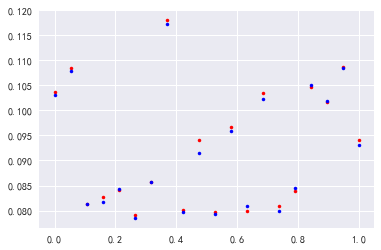

In [105]:
plt.figure()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
x = np.linspace(0,1,20)
plt.plot(x,np.exp(weight_avg.predict(X_test[0:20])),'r.',x,np.exp(y_test[0:20]),'b.')

In [113]:
#X_train[X_train['volume'].isin([50])]
for i in range(187,3896):
    print(X_train[X_train['volume'].isin([i])])

Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: 

Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: 

Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: 

Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: 

Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: 

Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame

Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: 

Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame

Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: 

Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: 

Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: 

Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame

Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: 

Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: 

Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: 

Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: 

Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: [mean_width, surface, volume]
Index: []
Empty DataFrame
Columns: 

In [ ]:
LR=LinearRegression()
RFR=RandomForestRegressor(n_estimators=500)
GBR=GradientBoostingRegressor(n_estimators=200)
LSVR=LinearSVR(C=300,epsilon=0.01)
BR=BayesianRidge(alpha_1=1e-07, alpha_2=1e-05, n_iter=300)
ETR=ExtraTreesRegressor(n_estimators=100,max_features=1)
XGBR=XGBRegressor(gamma=0.0001, n_estimators=100)

In [137]:
import numpy as np
from sklearn.model_selection import KFold

In [145]:
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)

    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))

        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])

        self.meta_model.fit(oof_train,y)
        return self

    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)

    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [146]:
a = Imputer().fit_transform(X_train)
b = Imputer().fit_transform(y_train.values.reshape(-1,1)).ravel()

In [147]:
stack_model = stacking(mod=[RFR,GBR,LSVR,BR,ETR,XGBR],meta_model=GBR)

In [148]:
score = rmse_cv(stack_model,a,b)
print(score.mean())

0.011170153218893376


In [149]:
stack_model.fit(a,b)

stacking(meta_model=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
     mod=[RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50..., reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)])

In [157]:
#np.exp(stack_model.predict(pd.DataFrame.as_matrix(X_test)))
compute_rmse(np.exp(stack_model.predict(pd.DataFrame.as_matrix(X_test))), np.exp(y_test))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


0.0010396580431543633

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


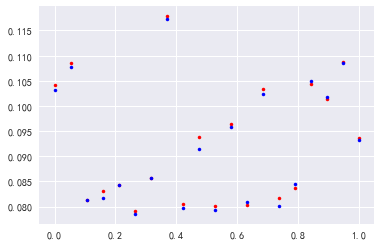

In [156]:
plt.figure()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
x = np.linspace(0,1,20)
plt.plot(x,np.exp(stack_model.predict(pd.DataFrame.as_matrix(X_test[0:20]))),'r.',x,np.exp(y_test[0:20]),'b.')